# Pokemon data analysis

In [3]:
import pandas as pd

In [4]:
# loading the column
df = pd.read_csv('pokemon_data.csv')
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
# Exploring the data
print("The shape of the dataframe:",df.shape)
print(df.info())
print(df.describe())

The shape of the dataframe: (800, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
None
                #          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750   69.258750   79.001250   73.842500   72.820000   71

There are 800 records and 12 features in this dataset

These are the columns to analyze

## Data Cleaning
### 1) Checking missing values
### 2) Duplicates
### 3) Remaning columns

In [6]:
# Missing values
print('Missing values:', df.isnull().sum())

Missing values: #               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


The feature 'Type 2' seems to be only one which is incomplete hence we can avoid it to take any decision from

In [7]:
# Duplicates
print(df.duplicated().sum())

0


No duplicates found

In [8]:
# Fetching the column names
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [9]:
# Renaming for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['#', 'name', 'type_1', 'type_2', 'hp', 'attack', 'defense', 'sp._atk',
       'sp._def', 'speed', 'generation', 'legendary'],
      dtype='object')

## Exploratory Data Analyst

In [10]:
# Categorical Analysis
print(df['type_1'].value_counts())

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: type_1, dtype: int64


In [11]:
print(df['generation'].value_counts())

1    166
5    165
3    160
4    121
2    106
6     82
Name: generation, dtype: int64


In [12]:
# Numerical Analysis
# Best attack
print(df[['name','attack']].nlargest(10,'attack'))

                        name  attack
163      MewtwoMega Mewtwo X     190
232  HeracrossMega Heracross     185
424    GroudonPrimal Groudon     180
426    RayquazaMega Rayquaza     180
429       DeoxysAttack Forme     180
494    GarchompMega Garchomp     170
711       KyuremBlack Kyurem     170
387      BanetteMega Banette     165
454                Rampardos     165
527      GalladeMega Gallade     165


In [13]:
# Best Defense
print(df[['name','defense']].nlargest(10, 'defense'))

                    name  defense
224  SteelixMega Steelix      230
230              Shuckle      230
333    AggronMega Aggron      230
223              Steelix      200
414             Regirock      200
789              Avalugg      184
87   SlowbroMega Slowbro      180
98              Cloyster      180
332               Aggron      180
456            Bastiodon      168


In [14]:
# Best Speed
print(df[['name','speed']].nlargest(10, 'speed'))

                          name  speed
431          DeoxysSpeed Forme    180
315                    Ninjask    160
71       AlakazamMega Alakazam    150
154  AerodactylMega Aerodactyl    150
428         DeoxysNormal Forme    150
429         DeoxysAttack Forme    150
19       BeedrillMega Beedrill    145
275      SceptileMega Sceptile    145
678                   Accelgor    145
109                  Electrode    140


In [15]:
# Average stats by type
avg_stats_by_type = df.groupby('type_1')[['attack','defense','hp']].mean().sort_values('attack',ascending = False)
print(avg_stats_by_type)

              attack     defense         hp
type_1                                     
Dragon    112.125000   86.375000  83.312500
Fighting   96.777778   65.925926  69.851852
Ground     95.750000   84.843750  73.781250
Rock       92.863636  100.795455  65.363636
Steel      92.703704  126.370370  65.222222
Dark       88.387097   70.225806  66.806452
Fire       84.769231   67.769231  69.903846
Flying     78.750000   66.250000  70.750000
Poison     74.678571   68.821429  67.250000
Water      74.151786   72.946429  72.062500
Ghost      73.781250   81.187500  64.437500
Normal     73.469388   59.846939  77.275510
Grass      73.214286   70.800000  67.271429
Ice        72.750000   71.416667  72.000000
Psychic    71.456140   67.684211  70.631579
Bug        70.971014   70.724638  56.884058
Electric   69.090909   66.295455  59.795455
Fairy      61.529412   65.705882  74.117647


In [16]:
# Legendary vs non-legendary
legendary_stats = df.groupby('legendary')[['attack','defense','speed']].mean()
print(legendary_stats)

               attack    defense       speed
legendary                                   
False       75.669388  71.559184   65.455782
True       116.676923  99.661538  100.184615


## Feature Engineering

In [17]:
# Total stats
df['total_stats'] =df[["hp","attack","defense","sp._atk","sp._def","speed"]].sum(axis=1)
df['total_stats']

0      318
1      405
2      525
3      625
4      309
      ... 
795    600
796    700
797    600
798    680
799    600
Name: total_stats, Length: 800, dtype: int64

In [18]:
#Strong pokemon flag
df['strong_pokemon'] = df['total_stats'] > 500
df['strong_pokemon'].value_counts()

False    576
True     224
Name: strong_pokemon, dtype: int64

## Visualizing

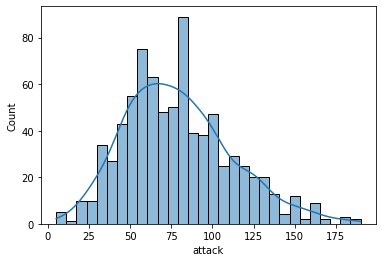

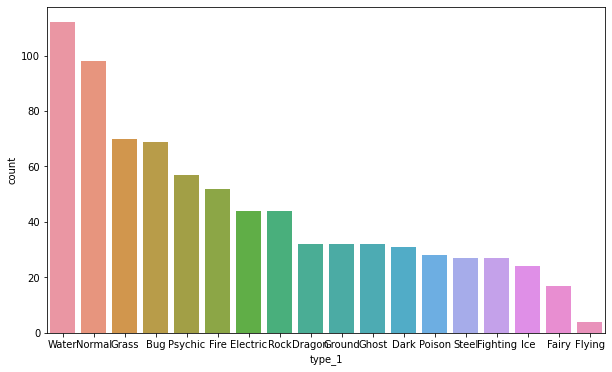

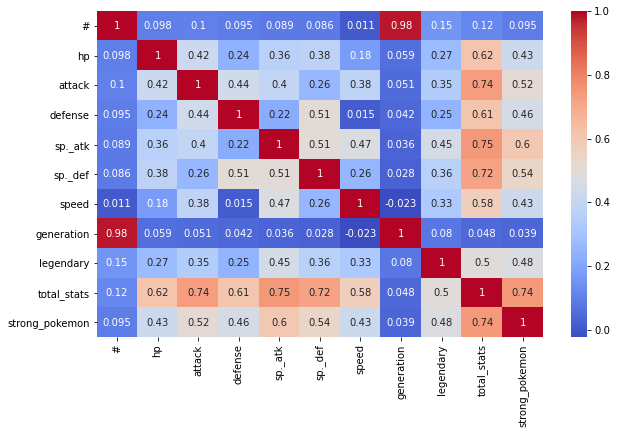

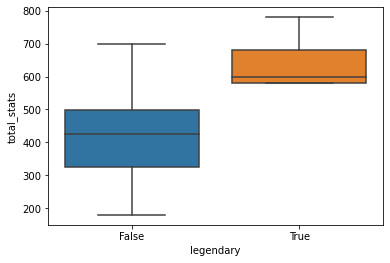

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of attack
sns.histplot(df['attack'], bins = 30, kde = True)
plt.show()

#Pokemon by type
plt.figure(figsize = (10,6))
sns.countplot(x='type_1',data = df, order = df['type_1'].value_counts().index)
plt.xticks()
plt.show()

# Correlation heatmap
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#Legendary vs Non-Legendary total_stats
sns.boxplot(x='legendary', y ='total_stats', data=df)
plt.show()

## Exporting results

In [20]:
# Saving cleaned dataset
df.to_csv('pokemon_Dataset_cleaned.csv', index = False)

#Saving grouped insights
avg_stats_by_type.to_csv('avg_stats_by_type.csv')